## Problem Statement

### We have a data which contains detail about customer bank relationship.

**Our object is to build a model and predict wheather the average balance of the customer will fall below the minimum balance in the consicutive month or not.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/churn_prediction_simple.csv")
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,10096.58,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [3]:
data.info()

# Column churn is the target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [4]:
# Checking the data set distribution
data['churn'].value_counts()/len(data)

0    0.806317
1    0.193683
Name: churn, dtype: float64

**It is a logistic regression model therefore it is divided into class-0 and class-1**

Here class-0 is 80% and class-1 is 20% hence data is imbalance.

In [5]:
X = data.drop(columns = ["churn","customer_id"])
Y = data["churn"]

In [6]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_X = scaler.fit_transform(X)


In [7]:
# Spliting the dataset
from sklearn.model_selection import train_test_split as tts
X_train, X_test, Y_train, Y_test = tts(scaler_X,Y,train_size=0.80,stratify=Y)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

If variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, **stratify=y** will make sure that your random split has 25% of 0's and 75% of 1's.

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(class_weight='balanced')

**class_weight='balanced' :** Balanced weight will add a multiplier to the minority class 1, hence error can not be negleted for minority class. 

In [9]:
classifier.fit(X_train,Y_train)
predicted_values = classifier.predict(X_test)  # predicted class
predicted_probability  = classifier.predict_proba(X_test)  # predicted probability

In [10]:
predicted_values

array([0, 1, 0, ..., 0, 1, 0])

In [11]:
predicted_probability

array([[0.66918291, 0.33081709],
       [0.42884651, 0.57115349],
       [0.59055515, 0.40944485],
       ...,
       [0.51008554, 0.48991446],
       [0.49273894, 0.50726106],
       [0.51042923, 0.48957077]])

Here first columns represent the probability with class 0 and second column with class 1.

In [12]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(Y_test,predicted_values)
cf

array([[2642,  917],
       [ 303,  552]])

### Evaluation Metrics

In [13]:
# Accuracy
classifier.score(X_test,Y_test)

0.7236067059356592

It is showing a good accuracy, but data is imbalance therefore we must check precision and recall

In [14]:
# Precision
from sklearn.metrics import precision_score as ps
Precision = ps(Y_test,predicted_values)
Precision

0.37576582709326073

Conclusion: approx 38% of result are predicted false positive(FP)

In [15]:
# Recall
from sklearn.metrics import recall_score
Recall = recall_score(Y_test,predicted_values)
Recall

0.6456140350877193

Conclusion: Out of overall positive person only 64% have been predict positive.

**If we are not sure about what to choose, then we must look for the F1 score.**


In [16]:
f1 = 2/((1/Precision)+(1/Recall))
f1

0.47504302925989667

In [17]:
from sklearn.metrics import f1_score
F1 = f1_score(Y_test,predicted_values)
F1

0.4750430292598968

**Calculating precision, recall , f1-score and support at once**

Support: It is nothing but the number of instances for the class 1 and class 0.

In [18]:
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision,recall,f1,support = PRF_summary(Y_test,predicted_values)

In [19]:
precision

array([0.89711375, 0.37576583])

In [20]:
recall

array([0.74234335, 0.64561404])

In [21]:
f1

array([0.81242312, 0.47504303])

In [22]:
support

array([3559,  855])

It is showing 2 values because first one is of class:0 and second one is for class:1

In [23]:
# Another method for the same

from sklearn.metrics import classification_report
k = classification_report(Y_test,predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      3559
           1       0.38      0.65      0.48       855

    accuracy                           0.72      4414
   macro avg       0.64      0.69      0.64      4414
weighted avg       0.80      0.72      0.75      4414



Drawback: This function is meant for representation purpose only , we cannot use its value.

In [24]:
from sklearn.metrics import precision_recall_curve
precision_points,recall_points,threshold_points = precision_recall_curve(Y_test,predicted_probability[:,1])
precision_points.shape,recall_points.shape,threshold_points.shape

((4415,), (4415,), (4414,))

conclusion: As the threshold_points is one less hence we will neglect this and only consider first 2

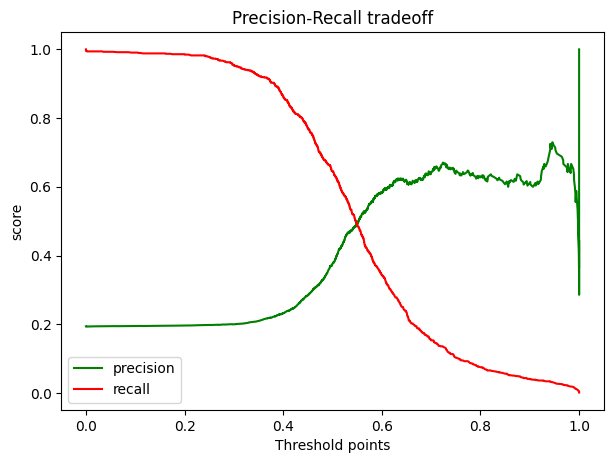

In [25]:
plt.figure(figsize=(7,5),dpi=100)
plt.plot(threshold_points,precision_points[:-1],color="green",label='precision')
plt.plot(threshold_points,recall_points[:-1],color="red",label='recall')
plt.xlabel('Threshold points')
plt.ylabel("score")
plt.title("Precision-Recall tradeoff")
plt.legend()
plt.show()

## AUC-ROC Curve

In [26]:
from sklearn.metrics import roc_curve , roc_auc_score
fpr, tpr, threshold = roc_curve(Y_test,predicted_probability[:,1])

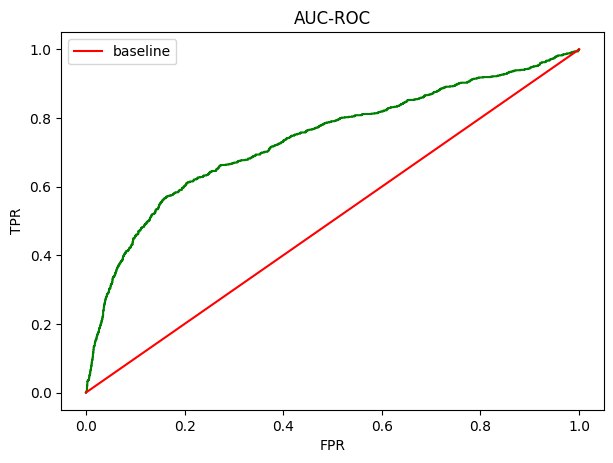

0.7369620548514679

In [27]:
plt.figure(figsize=(7,5),dpi=100)
plt.plot(fpr,tpr,color="green")
plt.plot([0,1],[0,1],label='baseline',color='red')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC-ROC")
plt.legend()
plt.show()
roc_auc_score(Y_test,predicted_probability[:,1])  # area

### Coefficient Plot

In [28]:
# arranging the data
c= classifier.coef_.reshape(-1)
x=X.columns

coeff_plot = pd.DataFrame({'coefficient':c,'variable':x})
coeff_plot.head()


,coefficient,variable
0,-0.189758,vintage
1,-0.086912,age
2,-0.055455,gender
3,0.039283,dependents
4,-0.098814,occupation


In [29]:
# sorting the values
coeff_plot = coeff_plot.sort_values(by='coefficient')
coeff_plot.head()

,coefficient,variable
9,-2.213768,current_balance
17,-0.591716,current_month_balance
10,-0.330055,previous_month_end_balance
12,-0.211044,average_monthly_balance_prevQ2
18,-0.204362,previous_month_balance


Text(0.5, 1.0, 'Coefficient plot')

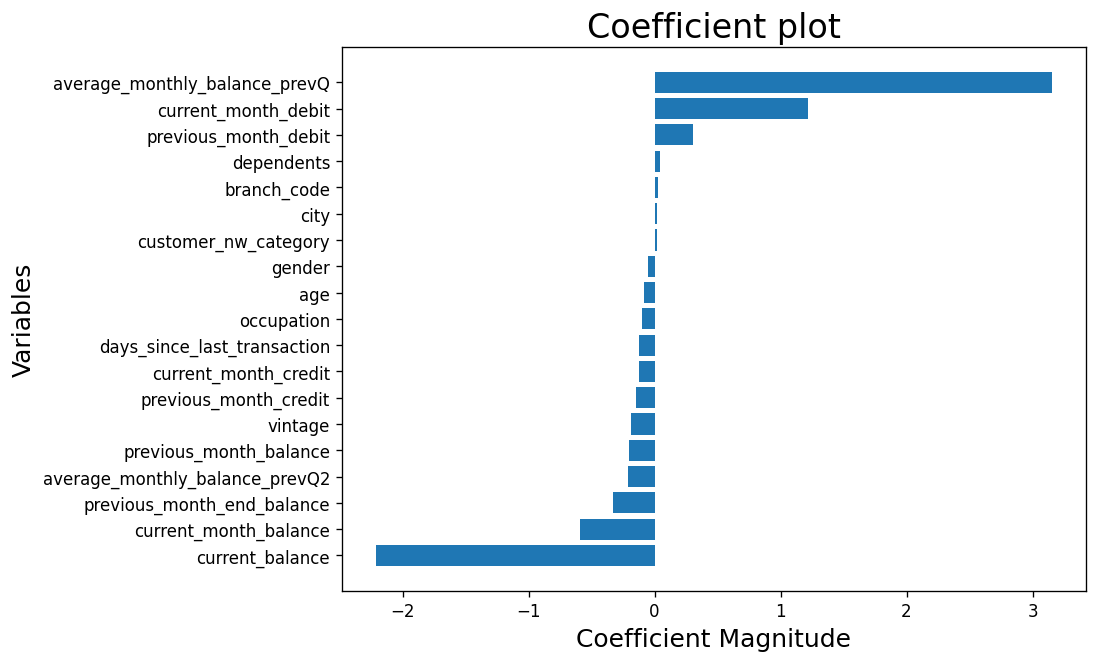

In [31]:
plt.figure(figsize=(8, 6), dpi=120)
plt.barh( coeff_plot['variable'] , coeff_plot['coefficient'] )
plt.xlabel( "Coefficient Magnitude", fontsize = 15)
plt.ylabel('Variables', fontsize = 15)
plt.title('Coefficient plot', fontsize = 20)